In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from process_data import prepare_abalone, prepare_concrete, prepare_bank, prepare_iris, prepare_real_estate

In [2]:
def msse(pred, y):
    return np.sum((y - pred)**2) / y.shape[0]

In [3]:
def plot_predictions(pred, y, title, path):
    fig = plt.figure(figsize=(7, 7))
    # clear
    ax1 = plt.subplot(111)
    ax1.scatter(pred, y, alpha=0.2)
    ax1.set_title(title)
    ax1.set_xlabel('predicted')
    ax1.set_ylabel('true')
    ax1.plot(np.arange(0, y.max(), 0.1), np.arange(0, y.max(), 0.1))
    plt.savefig(path)

In [4]:
def plot_confusion(pred, y, classes, title, path):
    fig = plt.figure(figsize=(7, 7))
    mat = confusion_matrix(pred, y)
    cm = mat / np.sum(mat, axis=1).reshape(-1, 1)
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.savefig(path)

## Abalone

In [42]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_abalone()

/Users/SimonMcDonnell/Dissertation/process_data.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_test[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']])
/Users/SimonMcDonnell/miniconda3/envs/diss/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


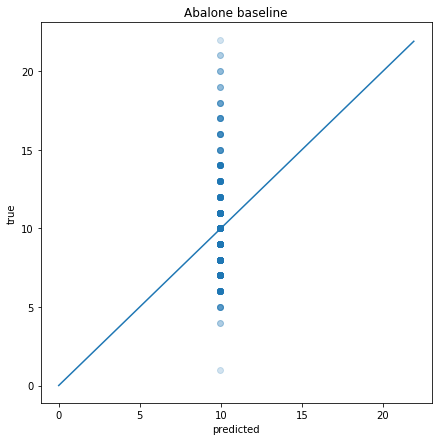

In [17]:
reg = DummyRegressor()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
plot_predictions(pred, y_test, 'Abalone baseline', 'graphs/abalone/test/abalone_baseline.pdf')

In [18]:
msse(pred, y_test)

9.689555027638841

## Concrete

In [19]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_concrete()

/Users/SimonMcDonnell/miniconda3/envs/diss/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/SimonMcDonnell/miniconda3/envs/diss/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/SimonMcDonnell/Dissertation/process_data.py:49: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  X_val = X_scaler.transform(X_val)
/Users/SimonMcDonnell/Dissertation/process_data.py:50: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  X_test = X_scaler.transform(X_test)


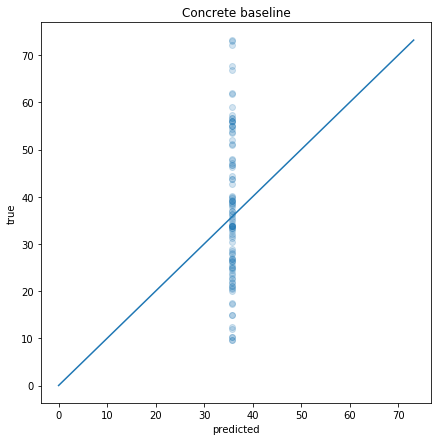

In [20]:
reg = DummyRegressor()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
plot_predictions(pred, y_test, 'Concrete baseline', 'graphs/concrete/test/concrete_baseline.pdf')

In [21]:
msse(pred, y_test)

231.97196322449489

## Bank

In [62]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_bank()

In [63]:
y_train.shape

(1098, 1)

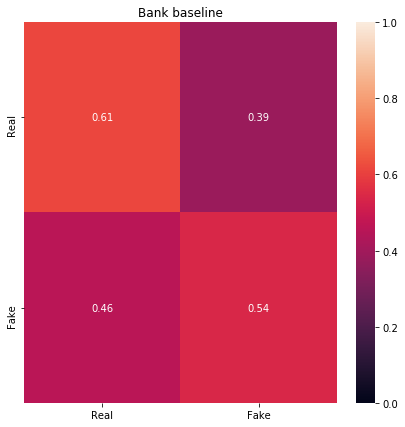

In [108]:
classifier = DummyClassifier()
classifier.fit(X_train, y_train.flatten())
pred = classifier.predict(X_test)
plot_confusion(pred, y_test, ['Real', 'Fake'], 'Bank baseline', 'graphs/bank/test/bank_baseline.pdf')

In [109]:
accuracy_score(pred, y_test)

0.5797101449275363

## Iris

In [10]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_iris()

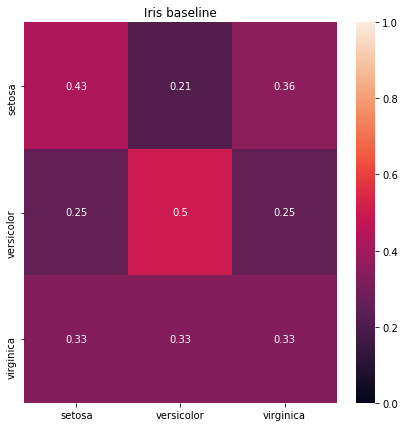

In [15]:
classifier = DummyClassifier()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
plot_confusion(pred.argmax(axis=1), y_test.argmax(axis=1), ['setosa', 'versicolor', 'virginica'], 
               'Iris baseline', 'graphs/iris/test/iris_baseline.pdf')

In [16]:
accuracy_score(pred.argmax(axis=1), y_test.argmax(axis=1))

0.4166666666666667

## Real Estate

In [6]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_real_estate()

/Users/SimonMcDonnell/miniconda3/envs/diss/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/SimonMcDonnell/miniconda3/envs/diss/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/SimonMcDonnell/Dissertation/process_data.py:119: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  X_val = X_scaler.transform(X_val)
/Users/SimonMcDonnell/Dissertation/process_data.py:120: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  X_test = X_scaler.transform(X_test)


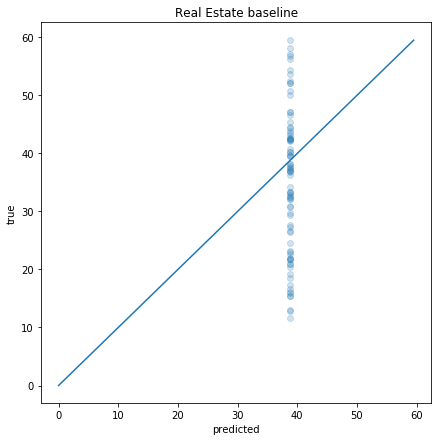

In [7]:
reg = DummyRegressor()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
plot_predictions(pred, y_test, 'Real Estate baseline', 'graphs/real_estate/test/real_estate_baseline.pdf')

In [8]:
msse(pred, y_test)

165.5644532454741